# Declaration of Originality

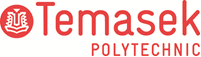

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : ZULZAWAID BIN ZUIKIFLI (2401713I)
* Tutorial Group                : T04
* Tutor						    : Mr Emile Sebastian
* Submission Date               : 10/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

Checklist

Dataset
Missing data
Distribution of target
Outliers
Pre-processing steps
Plots
Base model
Metric selected
Metric Score
Other models
Model refinement
Hyperparameters Tuning
Streamlit

In [451]:
import sys
print(sys.executable)

c:\Users\zawai\anaconda3\envs\mldp\python.exe


# Libraries

In [452]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding


### Goal: 

Predict whether a telecom customer will churn based on customer demographics, service subscriptions, contract type, tenure, and billing variables. This model will be helpful in identifying at-risk customers and in explaining key contributing factors to support targeted retention strategies.

This problem is a Classification problem.

# 2. Data Understanding

## 2.1 Load dataset

In [453]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'TelcoCustomerChurn.csv'
df = pd.read_csv(FILE_PATH)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 2.2 Summary Statistics

In [454]:
## Checking the shape of the DataFrame; to see how many rows and columns it has
print(df.shape)

(7043, 21)


In [455]:
## To get a quick visual check to see if the data loaded correctly, we can use the .head() method to display the first few rows of the DataFrame.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [456]:
## Checking for duplicates using customerID since customerID should be unique for each customer

duplicate_count = df.duplicated(subset=['customerID']).sum()
print(f"Number of duplicate customerID entries: {duplicate_count}")

Number of duplicate customerID entries: 0


In [457]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. Here, I observe that "TotalCharges" is stored as an "object" data type even thought it represents a numeric amount. This usually happens when the dataset contains a small number of non-numeric entries (such as blank strings), causing pandas to treat the entire column as text. To ensure the model can interpret this feature correctly, I will later convert "TotalCharges" to a numeric type. Before that, I will check whether this phenomenon is due to any missing data or any other reasons (such as NaN).

2. Although the data type for SeniorCitizen is int64, it is actually categorical (binary) and the system will simply treats it as a toggle switch (whether a SeniorCitizen / not). This is especially since there is no "2" or "3" to create a false sense of ranking or magnitude.

3. They are numerous non-numeric columns (Including the target variable [churn]). One-Hot Encoding will be needed.
4. "customerID" is an identifier, and not a feature. Hence, it will not help in prediction and generalization. As such, I will drop the column.


In [458]:
## Check for missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Even though the isna() method check returned zero, I will be scanning for blanks or spaces that the standard null-check doesn't catch. These 'hidden' blanks are often ignored by the isna() method but still count as invalid data.

In [459]:
obj_cols = df.select_dtypes(include="object").columns

blank_counts_obj = df[obj_cols].apply(lambda col: col.astype(str).str.strip().eq("").sum())
blank_counts_obj[blank_counts_obj > 0].sort_values(ascending=False)

TotalCharges    11
dtype: int64

I am limiting this check to "object" columns because whitespace and empty strings (blanks) are strictly text-based issues. Truly numeric columns don't hide blanks as Pandas either store them as NaN (which the isna() method would already have detected in the previous checks) or force the entire column to become an 'object' type. Therefore, "hidden" blanks almost exclusively reside in columns typed as objects, and by checking object columns, I'm catching the hidden strings that isna() might have missed. 

Here, I can see that there are 11 entries that are actually blanks.
Next, I will be checking the actual rows that have blank TotalCharges.

In [460]:
## Checking the actual rows with blank values in 'TotalCharges' column

df.loc[df["TotalCharges"].astype(str).str.strip() == "", ["tenure", "MonthlyCharges", "TotalCharges"]].head(15)

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,
753,0,20.25,
936,0,80.85,
1082,0,25.75,
1340,0,56.05,
3331,0,19.85,
3826,0,25.35,
4380,0,20.00,
5218,0,19.70,
6670,0,73.35,


Based on the table above, the data reveals that empty TotalCharges entries occur exclusively for customers with a tenure of "0". This suggests these are new accounts that haven't reached a billing cycle and hence the column REASONABLY reflects 'blanks'. To maintain data consistency, I will impute a value of 0 for these entries, accurately reflecting their current lack of accumulated charges.

In [461]:
## pd.to_numeric: Turning the text column 'TotalCharges' into numeric
## errors="coerce" will convert invalid parsing to NaN

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [462]:
## Check for missing data again after conversion

df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [463]:
## Since the blank values in 'TotalCharges' correspond to customers with 'tenure' of 0, we can reasonably fill these missing 'TotalCharges' with 0 as it reflecets no charges incurred.

df.loc[df["tenure"] == 0, "TotalCharges"] = 0

In [464]:
## Verifying the data type of 'TotalCharges' column after conversion

print(df["TotalCharges"].dtype)

float64


In [465]:
# Filtering rows where tenure is 0 to see the updated TotalCharges
df[df["tenure"] == 0][["tenure", "MonthlyCharges", "TotalCharges"]].head(15)

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,0.0
753,0,20.25,0.0
936,0,80.85,0.0
1082,0,25.75,0.0
1340,0,56.05,0.0
3331,0,19.85,0.0
3826,0,25.35,0.0
4380,0,20.00,0.0
5218,0,19.70,0.0
6670,0,73.35,0.0


In [466]:
print("Missing TotalCharges after conversion:", df["TotalCharges"].isna().sum())

Missing TotalCharges after conversion: 0


In [467]:
## Describe data distribution
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


## Insights Gained From The Data Distribution

1. I can see that the mean for SeniorCitizen is approximately 0.162. Since there is only about 16.2% of the customer base are senior citizens. This indicates a significant class imbalance in this feature, which the model needs to account for when predicting churn behaviour for different age demographics.
2. The dataset is well-balanced in terms of gender as gender is split almost 50/50 (3555 males out of 7043).
3. A large majority of customers do not have dependents (4933 out of 7043 ~ 70%), which could be a factor in their flexibility to churn or switch providers.
4. The most common contract is "Month-to-month" (3875 occurences). Since this is more than half the dataset, it suggests a highly volatile customer base that can leave at any time without penalty.
5. Nearly half of the customers do not have tech support (3473 occurences for "No"). There might be a correlation between "No TechSupport" and higher churn.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

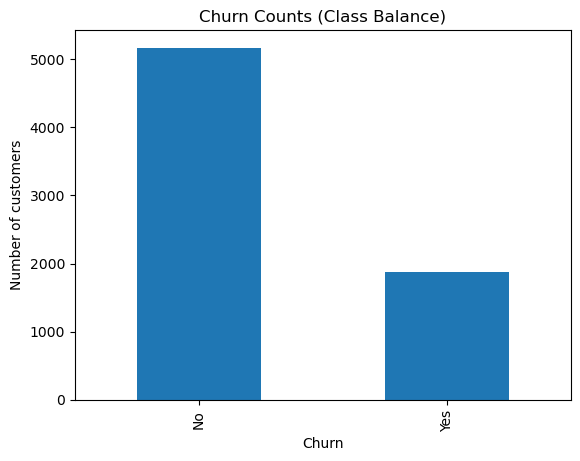

Churn rate: 0.2653698707936959


In [468]:
## Understanding distribution of target 
col_y = 'Churn'

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Counts (Class Balance)")
plt.xlabel("Churn")
plt.ylabel("Number of customers")
plt.show()

print("Churn rate:", (df["Churn"] == "Yes").mean())


There is a clear majority class "No". This indicates that "Accuracy" should not be the main metric in evaluating this model as if the model predicts "No" for every test case, it would still achieve a high accuracy rate

### 2.3.1.2 Understanding distribution of features

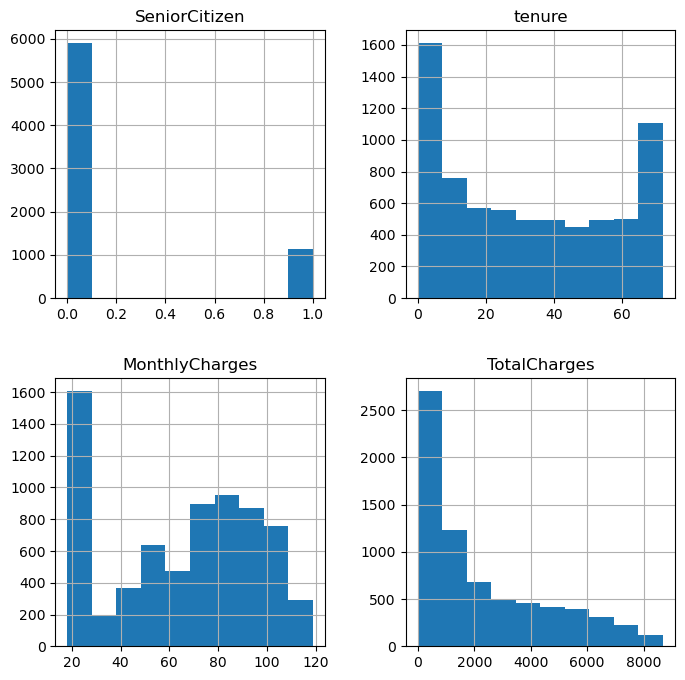

In [469]:
df.hist(figsize=(8, 8))
plt.show()


The diagrams show that there is a high concentration of customers at the very beginning and at the very end. The high peak (tenure) indicates a high "infant mortality rate" where customers are trying the service and leaving quickly. Conversely, the peak at high tenure represents a strong, loyal base. 

The high reading at the beginning ($20 mark in MonthlyCharges) suggests that a large segment of users is on the basic plans. 

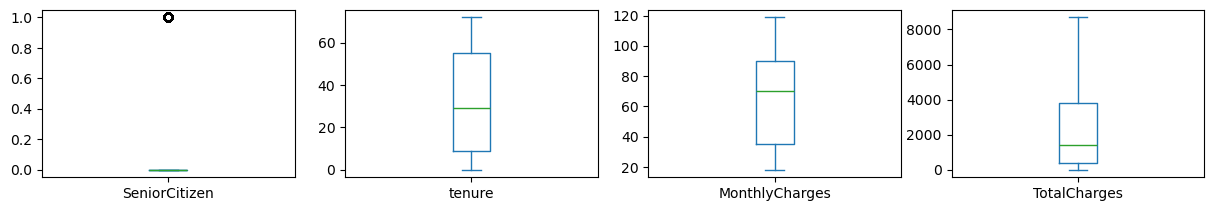

In [470]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

### 2.3.2 Understanding relationship between variables

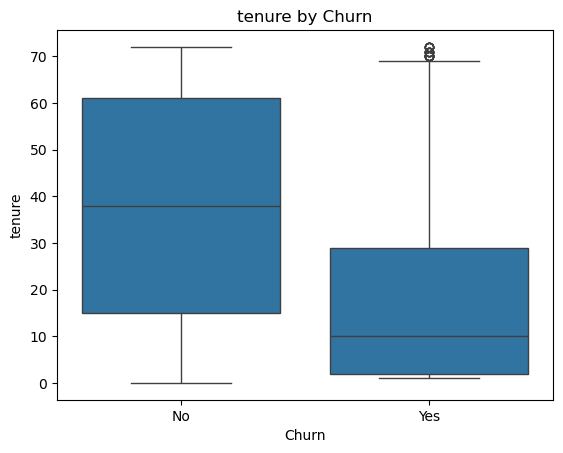

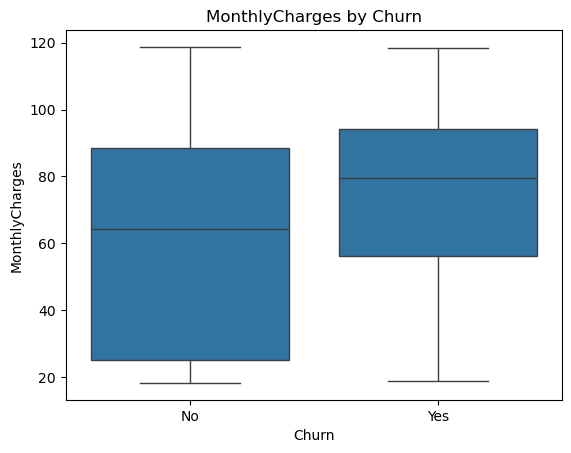

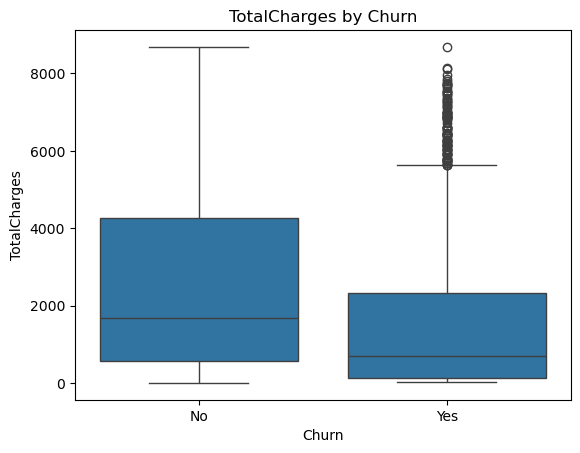

In [471]:
## Numeric columns distribution by target variable (vs Churn)

for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} by Churn")
    plt.show()

Based on the tenure boxplot above, I observe that the median tenure for customers who churn is significantly lower than those who stay (The "yes" box is much shorter and concentrated near the bottom of the scale). This indicates that recent customers are at a much higher risk. of churning.

The MonthlyCharges plot also shows that high monthly costs are a clear driver for churn. It could be inferred that ustomers paying higher rates are more sensitive to pricing and more likely to leave.

The TotalChargers boxplot shows that the median Total Charges for churners is lower than for no-churners. This is also proven by the fact that there are many outliers for "yes". A highly probable explanation forthis is that due to most of the churners leaving early, they did not accumulate high total charges.


Generally, the boxplots show very few outliers for tenure and MonthlyChargers proving that the data is relatively clean.

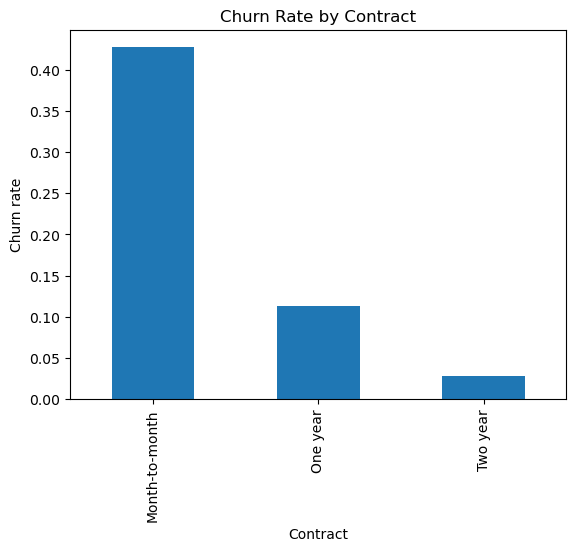

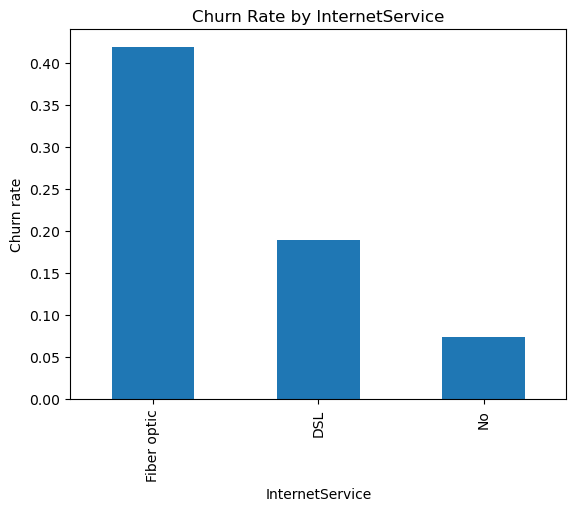

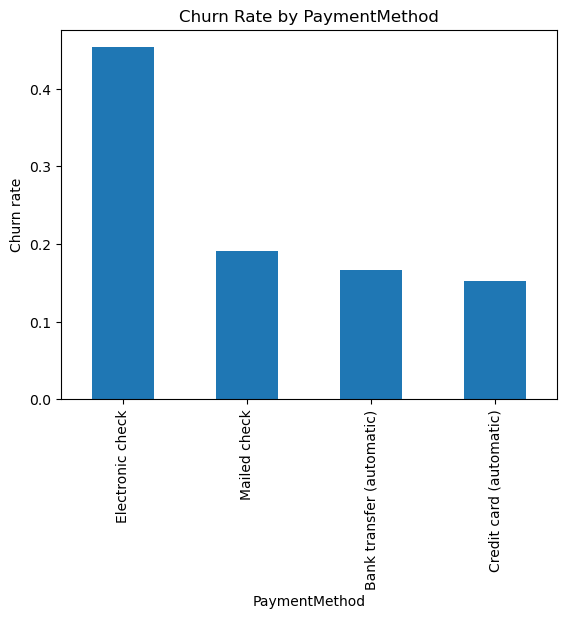

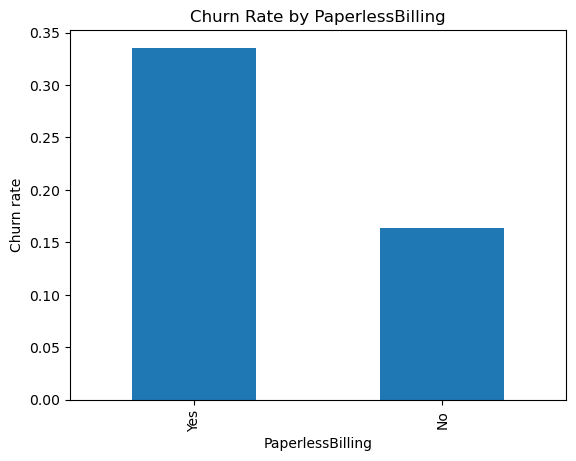

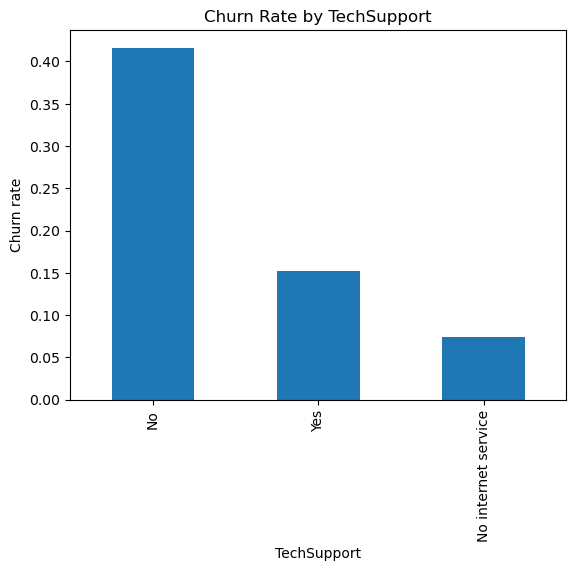

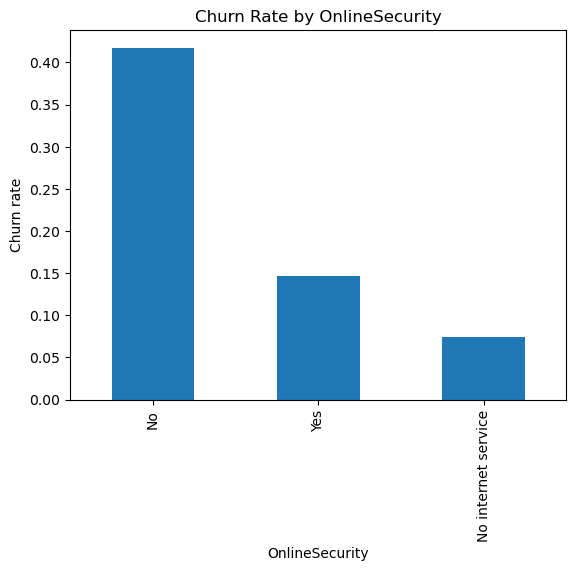

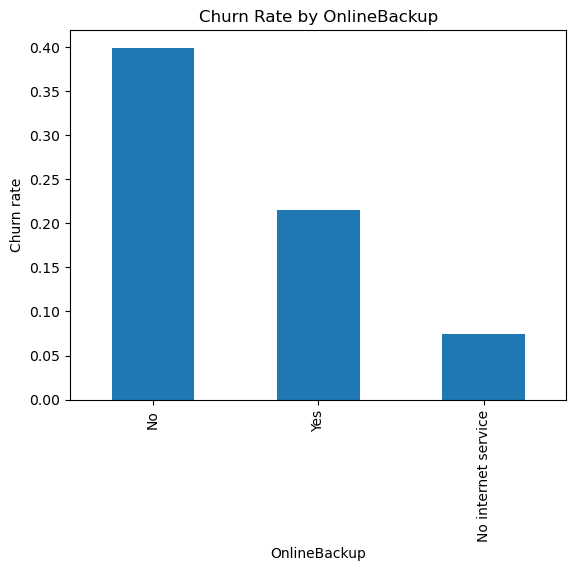

In [472]:
## Categorical features vs target variable

def plot_churn_rate(col):
    rate = df.groupby(col)["Churn"].apply(lambda s: (s == "Yes").mean()).sort_values(ascending=False)
    rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn rate")
    plt.xlabel(col)
    plt.show()

for col in ["Contract", "InternetService", "PaymentMethod", "PaperlessBilling",
            "TechSupport", "OnlineSecurity", "OnlineBackup"]:
    plot_churn_rate(col)

Analysis of categorical features reveals that churn is heavily driven by Contract Type, Internet Service, and Support services. Specifically, customers on month-to-month contracts and those using Fiber Optic without technical support or online security show the highest churn rates. From a business perspective, this suggests that high-speed "premium" services without an adequate safety net of support lead to customer frustration.

These findings highlight significant Non-Linearity and feature interactions within the data, where the risk of churn is not tied to a single factor but rather a combination of service friction and lack of engagement. Consequently, simple linear models like Logistic Regression may struggle to capture these multi-dimensional relationships. This justifies the selection of Non-Linear Models, such as Random Forest or Neural Networks, which are inherently designed to detect complex patterns and interactions between categorical variables.


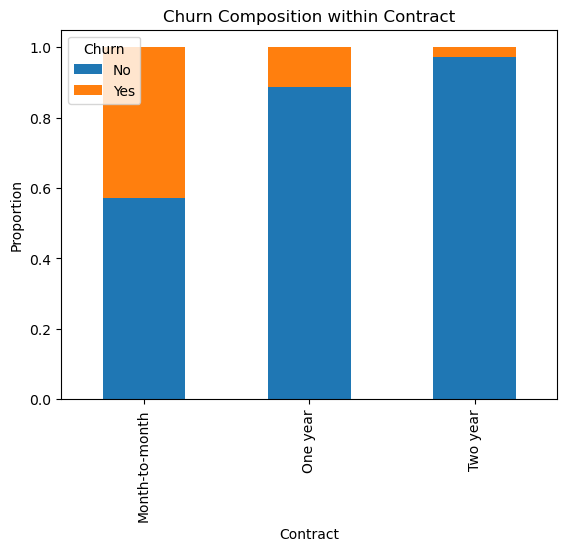

In [473]:
## Category composition within target variable

col = "Contract"  
ct = pd.crosstab(df[col], df["Churn"], normalize="index")
ct.plot(kind="bar", stacked=True)
plt.title(f"Churn Composition within {col}")
plt.ylabel("Proportion")
plt.show()

The stacked bar chart reveals a stark contrast in churn behavior across contract types. Month-to-month contracts show a significantly higher proportion of churned customers compared to one- or two-year commitments. This could be understood that short-term contracts act as a frictionless exit for the customers.

The clear disparity in these proportions alludes to the fact that "Contract" is a high-variance feature with strong predictive power. The presence of these distinct segments demonstrates Non-Linearity within the dataset, meaning the relationship between a customer's contract and their likelihood to churn is not a simple gradient but a series of sharp shifts. This justifies the use of Non-Linear Models, which excel at creating decision splits based on categorical weights. These models are usually more effective than basic linear algorithms at capturing the "interaction" between contract length and other variables

C:\Users\zawai\AppData\Local\Temp\ipykernel_29820\3623973676.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = tmp.pivot_table(index="Contract", columns="tenure_group", values="Churn01", aggfunc="mean")


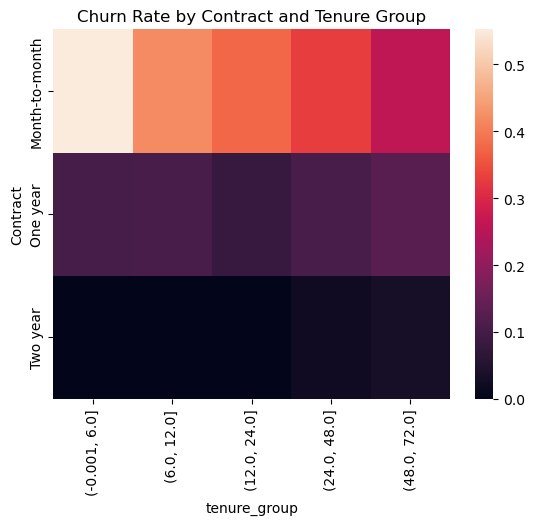

In [474]:
## create a copy of datra so we can manipulate it without affecting the original DataFrame
tmp = df.copy()

## Changing yes/no labels into 1/0 (binary)
tmp["Churn01"] = (tmp["Churn"] == "Yes").astype(int)

## Binning: transforming 'tenure' into groups rather than having to read 72 individual columns
tmp["tenure_group"] = pd.cut(tmp["tenure"], bins=[0,6,12,24,48,72], include_lowest=True)

## rows and columns pivot table
pivot = tmp.pivot_table(index="Contract", columns="tenure_group", values="Churn01", aggfunc="mean")
sns.heatmap(pivot, annot=False)
plt.title("Churn Rate by Contract and Tenure Group")
plt.show()


The interaction between contract type and tenure identifies a high-risk "Danger Zone" for customers on month-to-month plans within their first six months, suggesting that retention efforts are most critical during this early onboarding phase. This non-linear relationship—where churn risk significantly drops as tenure increases also suggests that using tree-based ensemble models rather than simple linear model is better

In [475]:
## Understanding relationship between features (numeric correlation)
col_numeric = df.select_dtypes(include=['float', 'int']).columns

df_corr = df[col_numeric].corr()
df_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


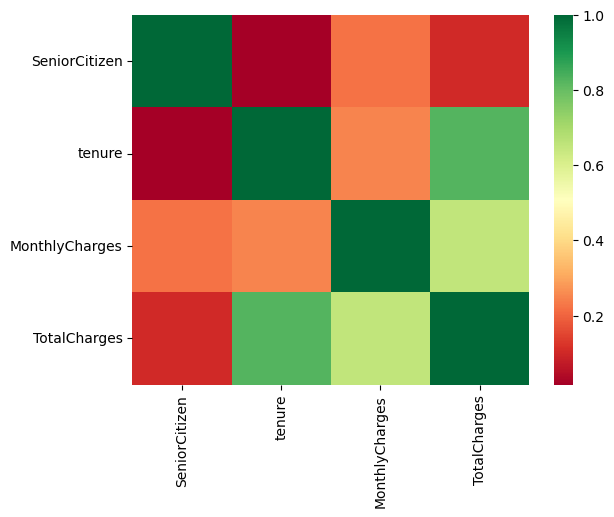

In [476]:
## Heatmap of correlation matrix

sns.heatmap(df_corr,cmap='RdYlGn')
plt.show()

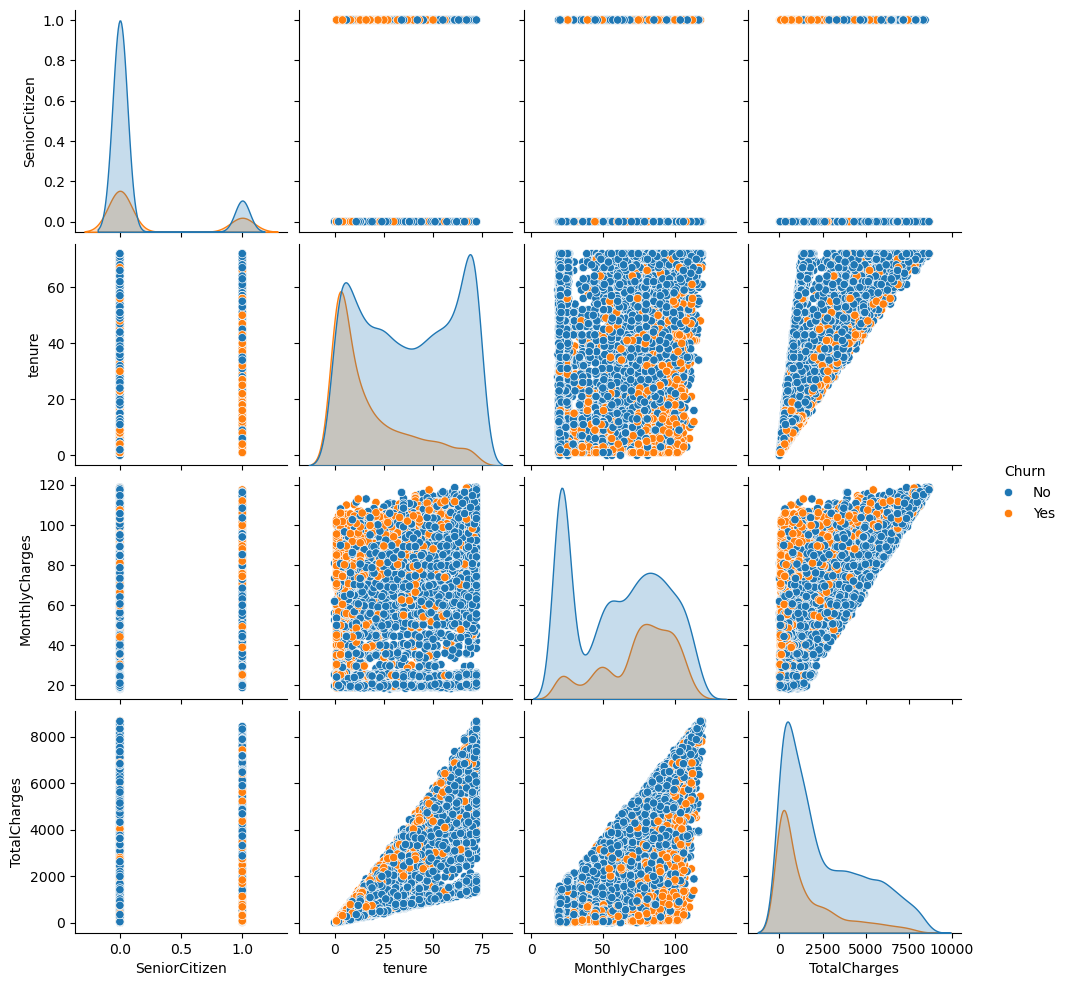

In [477]:
## pairplot to understand relationship between features

sns.pairplot(df, hue=col_y)
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

Talk about mapping here. and why we are doing it here.

In [478]:
## Dropping target column and identifier column
## I am dropping the identifier column 'customerID' as it is not relevant for prediction
col_irrelevant = [col_y, 'customerID']

## Splitting data into features (X) and target (y)
y = df[col_y].map({"Yes": 1, "No": 0})
X = df.drop(col_irrelevant, axis=1) ## X is now features only

## Performing one-hot encoding on categorical variables
## X = pd.get_dummies(X, drop_first=True)
## At this stage, I will be doing OHE later as I will be using Pipelines


X



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [479]:
## Checking whether all features are ML models friendly after One-Hot Encoding 

## X.dtypes

Here, we can see that the categorical columns are of boolean data type

## 3.2 Train-Test Split

In [480]:
## Splitting data into train set and test set

from sklearn.model_selection import train_test_split

test_size = 0.3 ## 30% for test set and 70% for train set
random_state = 2025 ## for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state,
                                                    stratify=y) ## stratify to maintain class balance in train and test sets

In [481]:
print(df['Churn'].value_counts())
print(tmp['Churn01'].sum())

Churn
No     5174
Yes    1869
Name: count, dtype: int64
1869


I used a stratified split to ensure the churn and non-churn proportions remain consistent across the training and test sets, so model evaluation is representative, especially since the dataset is imbalanced (with churners forming only about ~26-27% of the data while ~73-74% are non-churn). A non-stratified split can accidentally create a test set with a noticeably different churn rate, which would make the evaluation less representative.

In [482]:
print("Overall churn rate:", (y == "Yes").mean())
print("Train churn rate  :", (y_train == "Yes").mean())
print("Test churn rate   :", (y_test == "Yes").mean())

Overall churn rate: 0.0
Train churn rate  : 0.0
Test churn rate   : 0.0


# 4. Modelling &  5. Evaluation

# Different Models Employed

In this section, I will be develop and compare multiple machine learning models using an iterative modelling approach. Logistic Regression will be used as the overall baseline benchmark (to be refined). For each subsequent model, I will first train it using the default parameters, evaluate it, and then perform tuning to address any weakness observed.

The models employed are

1) Logistic Regression
2) Linear Discriminant Analysis
2) DecisionTreeClassifier
3) RandomForestClassifier
4) GradientBoosting

### Structure for each model

For consistency, each model will follow the same workflow:

1. Model rationale: Why this model is used at this stage and what is expected to improve or demonstrate
2. Baseline training and evaluation: Train the default model and report results using the selected metrics and confusion matrix
3. Key issue(s) observed: Identify performance gaps
4. Tuning / changes applied: I will then describe what was adjusted and why (hyperparameters / class_weight, etc.)
5. Post-tuning evaluation: Re-evaluate the tuned model and compare results against the baseline version (using the default hyperparameters)
6. Takeaway and comparison: I will summarize whether the tuned model improved performance and whether it outperformed the previous models

To note: Logistic Regression model as the baseline means it's the first, simplest model that will be used as the main reference point. 


## Model 1: Logistic Regression Model

In this iteration, I will build a Logistic Regression model because churn is a yes/no outcome, and this model gives a strong starting point that is easy to explain and also produces churn probability scores that I can use to decide a cut-off (e.g., which customers to flag as likely to churn).

### 4.1 Train Model (Logistic Regression Model)

In [483]:
## Initialise and train model (Logistic Regression) with Pipeline including One-Hot Encoding

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

numeric_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns

preprocess_scaled = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), numeric_cols),

        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols),
    ]
)

lr_pipe = Pipeline([
    ("prep", preprocess_scaled),
    ("clf", LogisticRegression(max_iter=2000, random_state=2025))
])

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)


### 5.1 Model Evaluation (Logistic Regression Model)

In [484]:
## Evaluate model

## Model Evaluation for Logistic Regression

from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8007572172266919


## Model 2: Linear Discriminant Analysis

In this iteration, I will build an LDA model because it is another simple classification model that can sometimes separate churn vs non-churn well, and it gives a useful comparison to Logistic Regression to see whether a different approach improves results.

### 4.2 Train Model (Linear Discriminant Analysis Model)

In [485]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Identify columns (based on RAW X_train)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns

# Scaled preprocessor (for LR + LDA)
preprocess_scaled = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), numeric_cols),

        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols),
    ]
)

# LDA pipeline
lda_pipe = Pipeline([
    ("prep", preprocess_scaled),
    ("clf", LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto"))
])

# Train
lda_pipe.fit(X_train, y_train)



,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### 5.2 Model Evaluation (Linear Discriminant Analysis)

In [486]:
# Predict / evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = lda_pipe.predict(X_test)

print("LDA Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

LDA Accuracy: 0.7979176526265973
Confusion Matrix:
 [[1373  179]
 [ 248  313]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1552
           1       0.64      0.56      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



## Model 3: Decision Tree Classifier

In this iteration, I will be building a Decision Tree Classifier. This model adds value beyond Logistic Regression because it can naturally capture non-linear relationships and feature interactions, which are common in churn behaviour. For example, churn is often influenced by different combinations of factors (such as contract type + tenure + monthly charges), and a decision tree can learn these patterns and present them as easy-to-read if–else rules that help explain why a customer is predicted to churn

### 4.3 Train Model (Decision Tree Classifier)

In [487]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

preprocess_noscale = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median"))
        ]), numeric_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols),
    ]
)

dt_pipe = Pipeline([
    ("prep", preprocess_noscale),
    ("clf", DecisionTreeClassifier(
        random_state=2025,
        max_depth=6,
        min_samples_leaf=20
    ))
])

dt_pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Prediction

In [488]:
y_pred = dt_pipe.predict(X_test)
y_proba = dt_pipe.predict_proba(X_test)[:, 1]

### 5.3 Evaluation (Decision Tree Classifier)

In [489]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score
)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy : 0.7936583057264552
Precision: 0.6288659793814433
Recall   : 0.5436720142602496

Confusion Matrix:
 [[1372  180]
 [ 256  305]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.63      0.54      0.58       561

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



## Model 4: Random Forest Classifier

In this iteration, I will build a Random Forest model because one decision tree can be unstable, but a forest combines many trees to make predictions that are usually more reliable and less affected by noise, which can improve churn prediction.

### 4.4 Train Model (Random Forest Classifier)

In [490]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


# Ensure these are lists (safer)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

preprocess_noscale = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median"))
        ]), numeric_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols),
    ]
)

rf_pipe = Pipeline([
    ("prep", preprocess_noscale),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        random_state=2025,
        class_weight="balanced"   # good for imbalanced churn
    ))
])

rf_pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Prediction

In [491]:
y_pred = rf_pipe.predict(X_test)
y_proba = rf_pipe.predict_proba(X_test)[:, 1]

### 5.4 Evaluation (Random Forest CLassifier)

In [492]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score
)

print("Random Forest Accuracy :", accuracy_score(y_test, y_pred))
print("Random Forest Precision:", precision_score(y_test, y_pred))
print("Random Forest Recall   :", recall_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Random Forest Accuracy : 0.7889256980596309
Random Forest Precision: 0.639225181598063
Random Forest Recall   : 0.47058823529411764

Confusion Matrix:
 [[1403  149]
 [ 297  264]]

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.64      0.47      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



## Model 5: Gradient Boosting Classifier

In this iteration, I will build a Gradient Boosting Classifier model because churn is often driven by subtle, interacting factors it improves results by building models step-by-step, where each new model focuses on the cases that were predicted wrongly earlier, so it can capture complex churn patterns more effectively than a single tree.

### 4.5 Train Model (Gradient Boosting Classifier)

In [493]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier

# Safer as lists
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

preprocess_noscale = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median"))
        ]), numeric_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols),
    ]
)

gb_pipe = Pipeline([
    ("prep", preprocess_noscale),
    ("clf", GradientBoostingClassifier(
        random_state=2025,
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3
    ))
])

gb_pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Prediction

In [494]:
y_pred = gb_pipe.predict(X_test)
y_proba = gb_pipe.predict_proba(X_test)[:, 1]

### 5.5 Evaluation (Gradient Boosting CLassifier)

In [495]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score
)

print("Gradient Boosting Accuracy :", accuracy_score(y_test, y_pred))
print("Gradient Boosting Precision:", precision_score(y_test, y_pred))
print("Gradient Boosting Recall   :", recall_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Gradient Boosting Accuracy : 0.8017037387600567
Gradient Boosting Precision: 0.6643518518518519
Gradient Boosting Recall   : 0.5115864527629234

Confusion Matrix:
 [[1407  145]
 [ 274  287]]

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.66      0.51      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [496]:
## to see the original columns to be provided in X_unseen_raw


raw_cols = df.drop([col_y, 'customerID'], axis=1).columns
print(list(raw_cols))

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [497]:
## Sending in our own custom values for prediction
## Building unseen data using original column names before One-Hot Encoding

import pandas as pd

X_unseen_raw = pd.DataFrame([
    {
        'gender': 'Female',
        'SeniorCitizen': 0,
        'Partner': 'Yes',
        'Dependents': 'No',
        'tenure': 1,
        'PhoneService': 'No',
        'MultipleLines': 'No phone service',
        'InternetService': 'DSL',
        'OnlineSecurity': 'Yes',
        'OnlineBackup': 'No',
        'DeviceProtection': 'No',
        'TechSupport': 'No',
        'StreamingTV': 'No',
        'StreamingMovies': 'No',
        'Contract': 'Month-to-month',
        'PaperlessBilling': 'Yes',
        'PaymentMethod': 'Electronic check',
        'MonthlyCharges': 29.85,
        'TotalCharges': 29.85
    },
    {
        'gender': 'Male',
        'SeniorCitizen': 1,
        'Partner': 'No',
        'Dependents': 'No',
        'tenure': 34,
        'PhoneService': 'Yes',
        'MultipleLines': 'No',
        'InternetService': 'Fiber optic',
        'OnlineSecurity': 'No',
        'OnlineBackup': 'Yes',
        'DeviceProtection': 'No',
        'TechSupport': 'No',
        'StreamingTV': 'No',
        'StreamingMovies': 'No',
        'Contract': 'One year',
        'PaperlessBilling': 'No',
        'PaymentMethod': 'Mailed check',
        'MonthlyCharges': 56.95,
        'TotalCharges': 1889.5
    }
])



In [498]:
## Applying OHE on unseen data
## X_unseen = pd.get_dummies(X_unseen_raw, drop_first=True)

## Aligning unseen data features with training data features
## X_unseen = X_unseen.reindex(columns=X_train.columns, fill_value=0)

In [499]:
## pred = logr.predict(X_unseen)
## print(pred)

Churn probability score?

Tuning, why am i tuning these parameters? what could be expected if i tune these parameters (what do i want to prove?)

## Iterative model development


In [500]:
## Initialise and train model (Logistic Regression)

In [501]:
## Further feature engineering / feature selection

Insights:

1. This LDA model prioritizes identifying churners (high recall for "Yes" = 0.82), meaning it is useful if the goal is to catch potential churners as possible for retention campaigns.
2. However, the model generates many false alarms (precision for "Yes" = 0.44), meaning the business may spend effort / resources containing customers who would not churn, so the usage of resources may not be optimal/efficient.

Compare with Logistic Regression; metrics
tune the decision threshold

Close of with the model choice based on:

1. business goal
2. Trade-offs

Prepare a table to compare all tuned models and justify choice

Plotting the tree

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

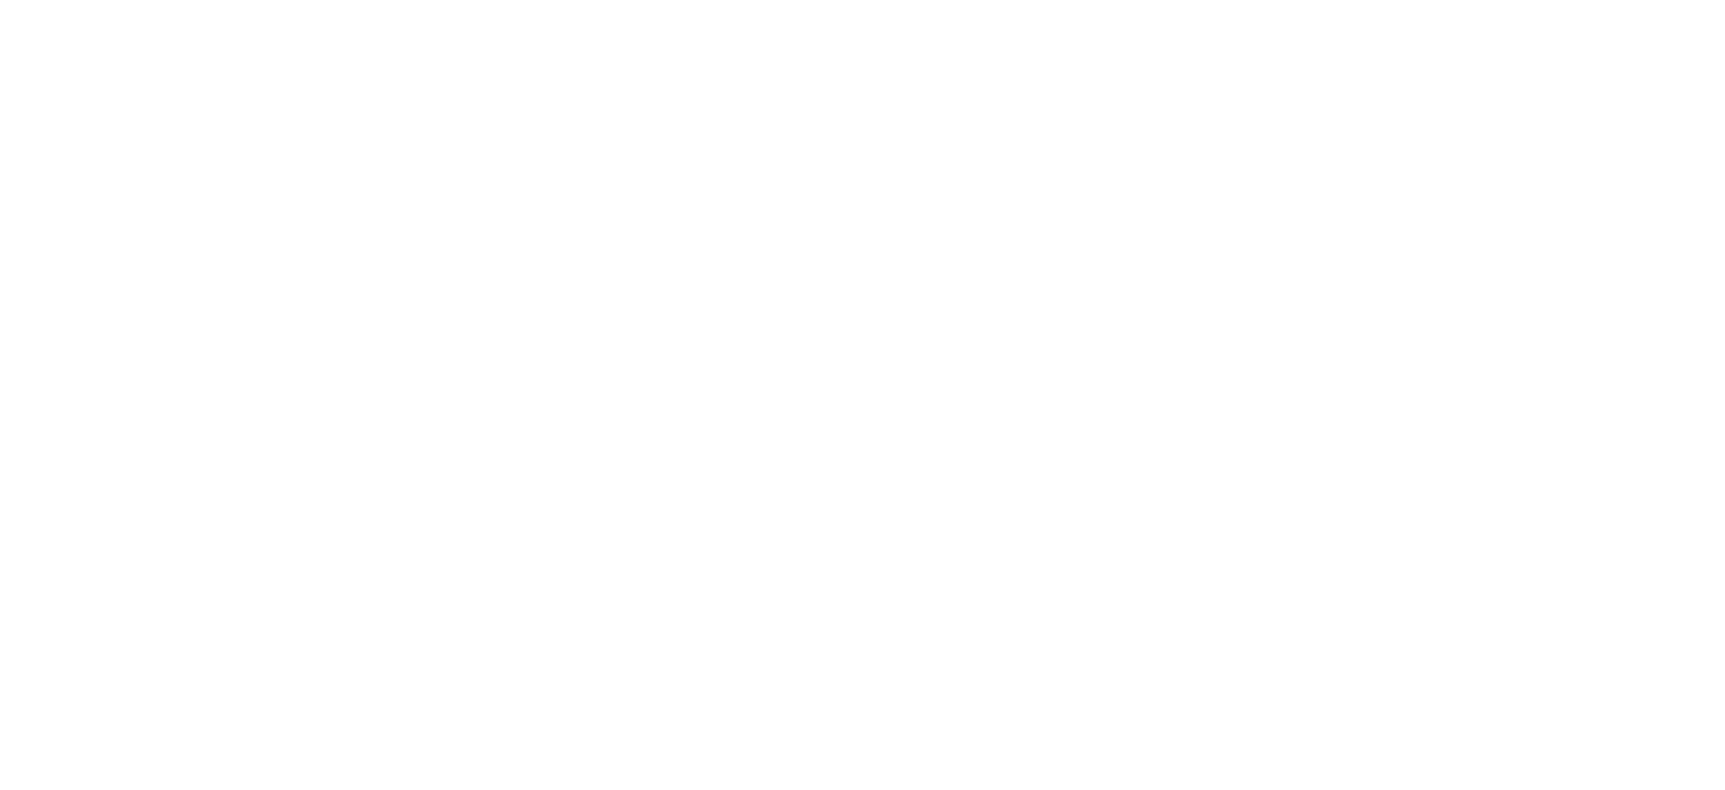

In [502]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=dt.feature_names_in_,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.show()


Tuning the parameters

In [ ]:
dt_tuned = DecisionTreeClassifier(
    random_state=2025,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)

dt_tuned.fit(X_train, y_train)
y_pred2 = dt_tuned.predict(X_test)

print("Accuracy (tuned):", accuracy_score(y_test, y_pred2))
print("\nConfusion Matrix (tuned):\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report (tuned):\n", classification_report(y_test, y_pred2))


Accuracy (tuned): 0.7908187411263606

Confusion Matrix (tuned):
 [[1421  131]
 [ 311  250]]

Classification Report (tuned):
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1552
           1       0.66      0.45      0.53       561

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



Model 4: Random Forest Classifier

Training a Random Forest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,      # number of trees (can keep default too)
    random_state=2025
)

rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Prediction

In [ ]:
# predicted class (0/1)
y_pred = rf.predict(X_test)

# predicted probability of class 1 (churn)
y_proba = rf.predict_proba(X_test)[:, 1]


Evaluation

In [ ]:
## Confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[1407,  145],
       [ 286,  275]])

In [ ]:
## Labelling confusion matrix components

TN, FP, FN, TP = cm.ravel()
TN, FP, FN, TP


(np.int64(1407), np.int64(145), np.int64(286), np.int64(275))

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy


np.float64(0.7960246095598675)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

print("Random Forest Accuracy :", accuracy_score(y_test, y_pred))
print("Random Forest Precision:", precision_score(y_test, y_pred))
print("Random Forest Recall   :", recall_score(y_test, y_pred))
print("Random Forest F1-score :", f1_score(y_test, y_pred))
print("Random Forest ROC-AUC  :", roc_auc_score(y_test, y_proba))
print()
print(classification_report(y_test, y_pred))


Random Forest Accuracy : 0.7960246095598675
Random Forest Precision: 0.6547619047619048
Random Forest Recall   : 0.49019607843137253
Random Forest F1-score : 0.5606523955147809
Random Forest ROC-AUC  : 0.8255146599408272

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.65      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.79      2113



Plotting ROC curve plot

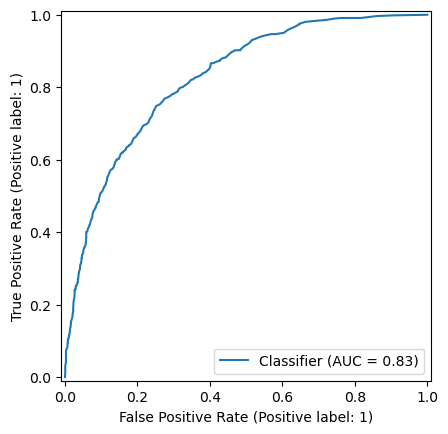

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.show()

Feature Importance (to be compared to other models)

In [ ]:
import pandas as pd

df_rf_feat_impt = pd.DataFrame({
    "Feature": rf.feature_names_in_,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

df_rf_feat_impt["Cumulative Importance"] = df_rf_feat_impt["Importance"].cumsum()

df_rf_feat_impt.head(20)


,Feature,Importance,Cumulative Importance
3,TotalCharges,0.194121,0.194121
2,MonthlyCharges,0.171332,0.365453
1,tenure,0.163867,0.529321
10,InternetService_Fiber optic,0.043262,0.572583
28,PaymentMethod_Electronic check,0.039107,0.611690
25,Contract_Two year,0.033420,0.645111
4,gender_Male,0.027040,0.672150
13,OnlineSecurity_Yes,0.026941,0.699092
26,PaperlessBilling_Yes,0.025920,0.725012
5,Partner_Yes,0.023044,0.748055


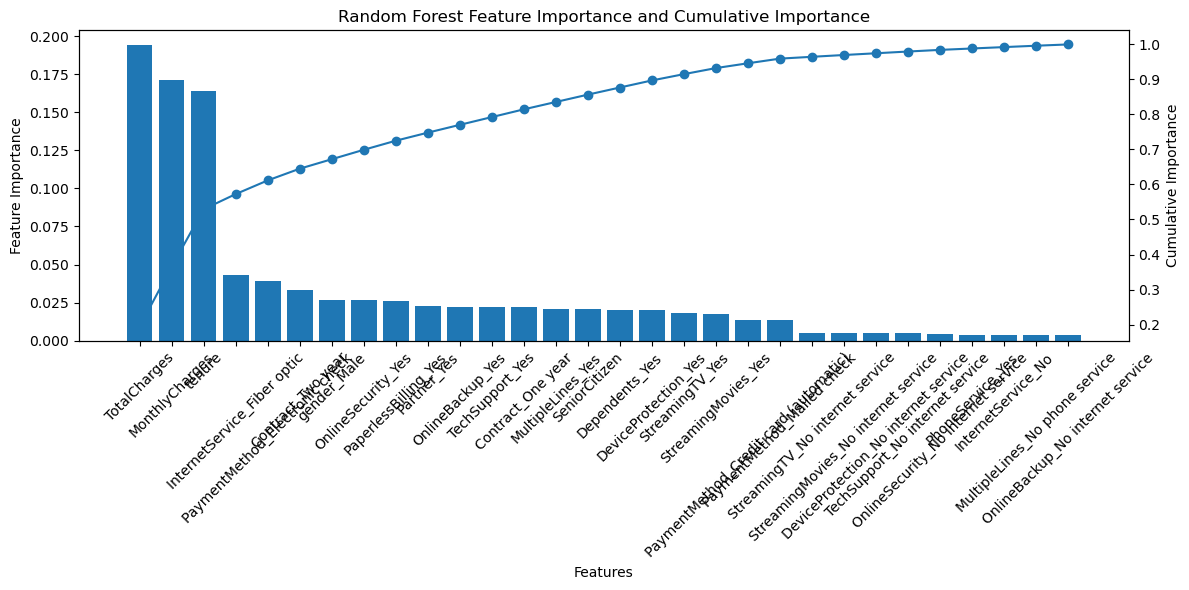

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(df_rf_feat_impt["Feature"], df_rf_feat_impt["Importance"])
ax1.set_xlabel("Features")
ax1.set_ylabel("Feature Importance")
ax1.tick_params(axis="x", rotation=45)

ax2 = ax1.twinx()
ax2.plot(df_rf_feat_impt["Feature"], df_rf_feat_impt["Cumulative Importance"], marker="o")
ax2.set_ylabel("Cumulative Importance")

plt.title("Random Forest Feature Importance and Cumulative Importance")
plt.tight_layout()
plt.show()


In [ ]:
FILE_PATH = "TelcoCustomerChurn.csv" 

# Load unseen
df_unseen = pd.read_csv(FILE_PATH)

# Keep the same original feature columns (before OHE)
col_df_X = df.drop(col_y, axis=1).columns
X_unseen = pd.DataFrame(df_unseen, columns=col_df_X)

# Apply OHE
X_unseen = pd.get_dummies(X_unseen, drop_first=True)

# Reindex to match training OHE columns
col_ohe = X.columns.tolist()
X_unseen = X_unseen.reindex(columns=col_ohe, fill_value=0)

# Predict
pred_class = rf.predict(X_unseen)
pred_proba = rf.predict_proba(X_unseen)[:, 1]

X_unseen["Predicted_Churn"] = pred_class
X_unseen["Predicted_Churn_Prob"] = pred_proba

X_unseen.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Predicted_Churn,Predicted_Churn_Prob
0,0,1,29.85,0,False,True,False,False,True,False,...,False,False,False,False,True,False,True,False,0,0.275000
1,0,34,56.95,0,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,0,0.205000
2,0,2,53.85,0,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,0,0.455000
3,0,45,42.30,0,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,0,0.165000
4,0,2,70.70,0,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,1,0.760833


In [ ]:
if col_y in df_unseen.columns:
    y_unseen = df_unseen[col_y].map({"Yes": 1, "No": 0})
    X_unseen["Actual"] = y_unseen
    X_unseen[["Predicted_Churn", "Predicted_Churn_Prob", "Actual"]].head()


need to do Cumulative importance?

and why are we not doing plot tree here?

Model 5: Gradient Boosting

Training

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(
    n_estimators=200,     # number of boosting stages (trees)
    learning_rate=0.05,   # smaller = slower but often generalises better
    max_depth=3,          # depth of individual trees (via base learners)
    random_state=2025
)

gbt.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Prediction

In [ ]:
# predicted class (0/1)
y_pred_gbt = gbt.predict(X_test)

# predicted probability of class 1 (churn)
y_proba_gbt = gbt.predict_proba(X_test)[:, 1]


Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

cm_gbt = confusion_matrix(y_test, y_pred_gbt)
cm_gbt

array([[1399,  153],
       [ 275,  286]])

In [ ]:
TN, FP, FN, TP = cm_gbt.ravel()
TN, FP, FN, TP


(np.int64(1399), np.int64(153), np.int64(275), np.int64(286))

In [ ]:
accuracy_gbt = (TP + TN) / (TP + TN + FP + FN)
accuracy_gbt


np.float64(0.7974443918599148)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, roc_auc_score
)

print("GBT Accuracy :", accuracy_score(y_test, y_pred_gbt))
print("GBT Precision:", precision_score(y_test, y_pred_gbt))
print("GBT Recall   :", recall_score(y_test, y_pred_gbt))
print("GBT F1-score :", f1_score(y_test, y_pred_gbt))
print("GBT ROC-AUC  :", roc_auc_score(y_test, y_proba_gbt))
print()
print(classification_report(y_test, y_pred_gbt))


GBT Accuracy : 0.7974443918599148
GBT Precision: 0.6514806378132119
GBT Recall   : 0.5098039215686274
GBT F1-score : 0.572
GBT ROC-AUC  : 0.8419548348861569

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



need to do cumulative importance?

Why no need plot tree here?

1) Logistic Regression
2) LDA
3) DecisionTreeClassifier
4) RandomForestClassifier
5) GradientBoosting

What does each of these do / what insights does each give? And what are their limitations?
Should i use other models?

Metrics

Confusion Matrix \n
Accuracy \n 
Precision / Recall \n
should / can i use other metrics?

Take note: If churn rate is low, F1 / Recall / Pr-AUC become more important than accuracy

Iterative Model Development

1. Start with a baseline model (Logistic Regression)
2. Evaluate and diagnose what's weak; for example: accuracy looks okay but recall for churnes is low (lots of false negatives. Explain is this okay?)
3. Make one improvement at a time, then retrain and compare
4. Try other models when it makes sense (so need to explain why train other types of models)
5. Pick the best model based on goal / metric (not just accuracy)

can use mix of models? like for some models is useful for something, and others for other things

something like:

based on the previous iterations of the different models, it is evident that some models can be beneficial in various different metrics:

what else? (cannot be just yes/no). something like determining the probabilty rate to be the cut-off point to churn? what else?

OR must just use one model?

how to implement neural network in this assignment? and what are the metrics that I want to apply it to?

what are the components / features that i can use as much as possible in my streamlit?

where should i use feature importance and cumulative importance?


include plot trees

3D graphs using plotly?